# 01 - EDA

Proyecto: Prediccion de user_score

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

project_dir = Path('..')
path = project_dir / 'data' / 'data.csv'
df = pd.read_csv(path)
df.head()

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
0,NaN,Super Mario 3D World + Bowser's Fury,Switch,"Feb 12, 2021",NaN,/game/switch/super-mario-3d-world-+-bowsers-fury,NaN,['Nintendo'],"['Action', 'Platformer', '3D']"
1,NaN,Super Smash Bros. Ultimate: Sephiroth,Switch,"Dec 22, 2020",NaN,/game/switch/super-smash-bros-ultimate-sephiroth,NaN,['Nintendo'],"['Action', '2D', 'Fighting']"
2,66.0,Fitness Boxing 2: Rhythm & Exercise,Switch,"Dec 4, 2020",6.2,/game/switch/fitness-boxing-2-rhythm-exercise,E,"['Nintendo', ' Imagineer Co.', 'Ltd.']","['Miscellaneous', 'Exercise / Fitness']"
3,63.0,Fire Emblem: Shadow Dragon & the Blade of Light,Switch,"Dec 4, 2020",7.6,/game/switch/fire-emblem-shadow-dragon-the-bla...,E,['Intelligent Systems'],"['Strategy', 'Turn-Based', 'Tactics']"
4,79.0,Hyrule Warriors: Age of Calamity,Switch,"Nov 20, 2020",8.1,/game/switch/hyrule-warriors-age-of-calamity,T,"['Omega Force', ' Koei Tecmo Games']","['Action', ""Beat-'Em-Up"", '3D']"


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   meta_score   661 non-null    float64
 1   title        1026 non-null   object 
 2   platform     1026 non-null   object 
 3   date         1026 non-null   object 
 4   user_score   777 non-null    float64
 5   link         1026 non-null   object 
 6   esrb_rating  910 non-null    object 
 7   developers   1014 non-null   object 
 8   genres       1017 non-null   object 
dtypes: float64(2), object(7)
memory usage: 72.3+ KB


In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
meta_score,661.0,NaN,NaN,NaN,75.956127,10.756938,37.0,69.0,77.0,83.0,99.0
title,1026,981,Captain Toad: Treasure Tracker,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
platform,1026,11,3DS,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,1026,686,TBA,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_score,777.0,NaN,NaN,NaN,7.695624,1.017163,2.0,7.2,7.9,8.4,9.7
link,1026,1024,/game/wii/fluidity,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
esrb_rating,910,5,E,631,NaN,NaN,NaN,NaN,NaN,NaN,NaN
developers,1014,190,['Nintendo'],332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genres,1017,297,"['Action', 'Platformer', '2D']",69,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
missing = df.isna().sum().to_frame('missing_count')
missing['missing_pct'] = missing['missing_count'] / len(df)
missing.sort_values('missing_pct', ascending=False)

,missing_count,missing_pct
meta_score,365,0.355750
user_score,249,0.242690
esrb_rating,116,0.113060
developers,12,0.011696
genres,9,0.008772
date,0,0.000000
platform,0,0.000000
title,0,0.000000
link,0,0.000000


Text(0, 0.5, 'count')

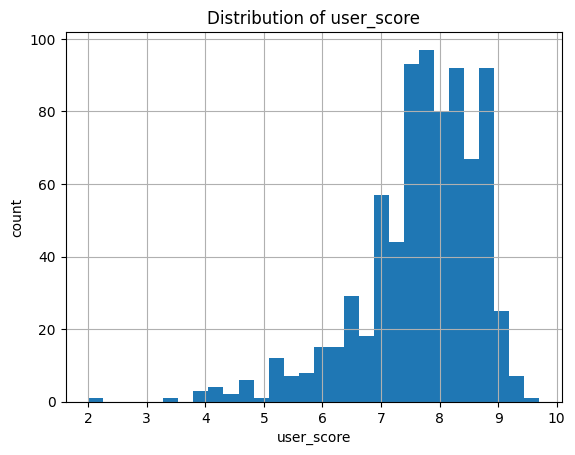

In [5]:
df['user_score'].hist(bins=30)
plt.title('Distribution of user_score')
plt.xlabel('user_score')
plt.ylabel('count')

Text(0, 0.5, 'count')

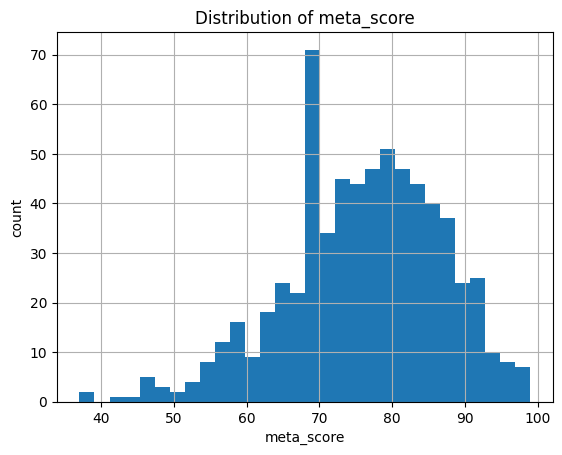

In [6]:
df['meta_score'].hist(bins=30)
plt.title('Distribution of meta_score')
plt.xlabel('meta_score')
plt.ylabel('count')

In [7]:
corr = df[['user_score','meta_score']].corr()
corr

,user_score,meta_score
user_score,1.000000,0.628851
meta_score,0.628851,1.000000
